In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

import warnings
warnings.filterwarnings("ignore")

***

# TweetsCov19
## KDE-Plot

***

In [2]:
path = '../data/tweetscov19_science_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetscov19_science_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_antiscience_domains', 'Number_of_proscience_domains', 'Sum_polarised_domains', 'science'])

print('Shape :', df_tweetscov19_science_polarized_and_neutralized.shape)
df_tweetscov19_science_polarized_and_neutralized.head()

Shape : (44493, 5)


,Username,Number_of_antiscience_domains,Number_of_proscience_domains,Sum_polarised_domains,science
0,000238f324f5063164908c27a7f310cd,-1,0,1,-1.0000
1,0002eb2aff20e181397afe8cdebdd395,0,1,1,1.0000
2,00065a00b971b5e1629d504e0ddf2da0,-3,0,3,-1.0000
3,0006a238065c3acb128041e666b58f07,0,2,2,1.0000
4,000795932bf3bc3ab05b5efc1b07104b,-1,0,1,-1.0000


In [3]:
pfad_tsv = '../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,0.9998,21,21,1.0000
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,0.9998,21,21,1.0000
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,0.9998,21,21,1.0000
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,0.9998,21,21,1.0000
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,0.9998,21,21,1.0000


In [4]:
df_tweetscov19_alltweets_reputation_deletionratio = df_tweetscov19_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetscov19_science_polarized_and_neutralized = df_tweetscov19_science_polarized_and_neutralized[['Username', 'science']]

df_tweetscov19 = pd.merge(df_tweetscov19_alltweets_reputation_deletionratio, df_tweetscov19_science_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetscov19.shape)
df_tweetscov19.head()

Form : (905746, 4)


,Username,is_deleted,Reputation,science
0,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
1,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
2,cd45cd8eae02f9b33d9e7de16042534d,True,0.8605,-1.0000
3,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
4,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000


****

In [5]:
print('Alle Users:', df_tweetscov19.Username.unique().size)


Alle Users: 44493


In [6]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['science'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (876719, 4)


,Username,is_deleted,Reputation,science
0,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
1,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
2,cd45cd8eae02f9b33d9e7de16042534d,True,0.8605,-1.0000
3,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000
4,cd45cd8eae02f9b33d9e7de16042534d,False,0.8605,-1.0000


In [16]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [17]:
print('Deleted Tweets:', df_tweetscov19_del.shape)
print('Non-deleted Tweets:', df_tweetscov19_undel.shape)

Deleted Tweets: (253163, 4)
Non-deleted Tweets: (652583, 4)


In [18]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gesammten Tweets:', df.shape[0])

df = df_tweetscov19[df_tweetscov19['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gesammten Tweets:', df.shape[0])


Alle Users: 44493
Alle pro. Users in gesammten Tweets: 18352
Tweets of pro. Users in gesammten Tweets: 291021
Alle anti. Users in gesammten Tweets: 25591
Tweets of anti. Users in gesammten Tweets: 585698


In [19]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_del[df_tweetscov19_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gelöschten Tweets:', df.shape[0])


Alle Users: 16030
Alle pro. Users in gelöschten Tweets: 4096
Tweets of pro. Users in gelöschten Tweets: 31194
Alle anti. Users in gelöschten Tweets: 11676
Tweets of anti. Users in gelöschten Tweets: 216169


In [20]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in nicht gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in nicht gelöschten Tweets:', df.shape[0])


Alle Users: 33446
Alle pro. Users in nicht gelöschten Tweets: 16225
Tweets of pro. Users in nicht gelöschten Tweets: 259827
Alle anti. Users in nicht gelöschten Tweets: 16784
Tweets of anti. Users in nicht gelöschten Tweets: 369529


In [21]:
df_tweetscov19_neutral = df_tweetscov19[df_tweetscov19['science']==0]
print('Alle Users:', df_tweetscov19_neutral.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['science']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 550
Alle neutral Users in gelöschten Tweets: 258
Tweets of neutral Users in gelöschten Tweets: 5800
Alle neutral Users in nicht gelöschten Tweets: 437
Tweets of neutral Users in nicht gelöschten Tweets: 23227


In [47]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


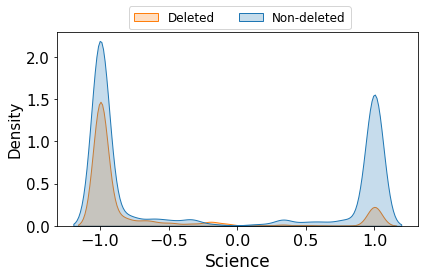

In [48]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v1(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_conditionaldistribution')

In [5]:
def plot_kdeplot_v2(df, hue, x, x_label, titel, name): 
    
    #fig = plt.figure()
    #ax = fig.add_subplot()
    #ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill", legend= False)

    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_title('Science', fontsize=22)
    ax.set_ylabel(ylabel='Density', fontsize=22)
    ax.set_xlabel(xlabel=x_label, fontsize=22)

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


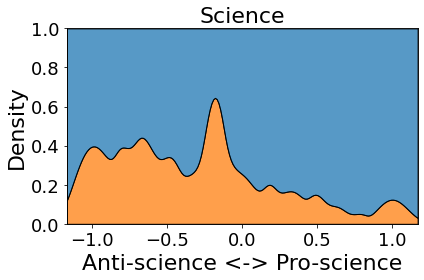

In [6]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v2(df, 'is_deleted','science' ,'Anti-science <-> Pro-science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_Normalizethestackeddistribution')

In [51]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


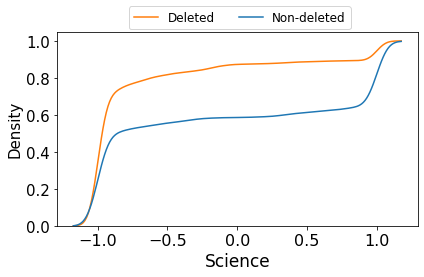

In [52]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v3(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

***

In [14]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram(df, titel):
    
    fig, ax = plt.subplots()
    
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('forestgreen')
    patches[1].set_label('Anti-Science')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('gold')
    patches[9].set_label('Pro-Science')
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Science', fontsize=22)
    ax.set_ylabel('Number of users', fontsize=22)
    ax.set_xlabel(xlabel='Anti-science <-> Pro-science', fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    #g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(g))
    
    #plt.title('Political polarization', fontsize=18)
    plt.legend(loc='upper center', fontsize=14)
    #plt.legend( fontsize=12)

    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

In [6]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [7]:
#matplotlib.rcParams['font.family'] = ['sans-serif']

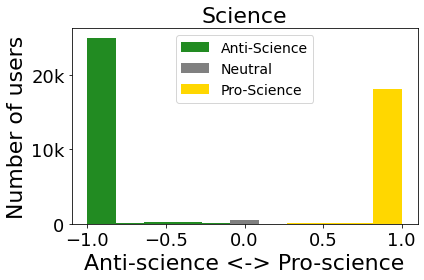

In [10]:
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(alltweets)')

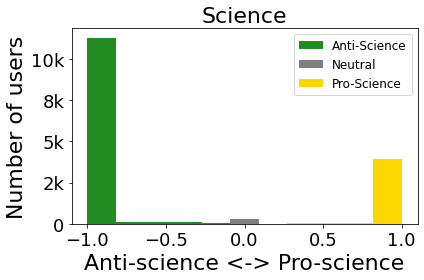

In [13]:
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(deletedtweets)')

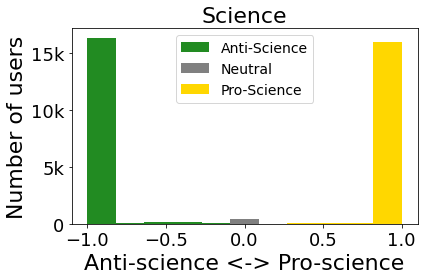

In [15]:
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram(df['science'],'hist_tweetsCov19_science_polarized_users(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

***

In [27]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

def density_hp(df, title, x, y, color):
    fig = px.density_heatmap(df, x=x, y=y, nbinsx=20, nbinsy=20, color_continuous_scale=color)
    fig.layout.height = 500
    fig.layout.width = 600
    fig.update_layout(
        title= dict(
            text= "Science",
            y=0.95,
            x=0.45,
            xanchor= 'center',
            yanchor= 'top'),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
        xaxis = dict(
            title='Anti-science  <->  Pro-science',
            
            tickmode = 'linear',
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        yaxis = dict(
            tickmode = 'linear',
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        coloraxis_colorbar=dict(
            title="Tweets",
            thicknessmode="pixels",
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 25,
            color = 'black'
              ),
            ),


        )

    #fig.show()
    pyo.plot(fig, filename=title+".html")
    fig.write_image('../plots/heatmaps/'+title+'.pdf')

In [28]:
#All Tweets
df = df_tweetscov19[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [29]:
density_hp(df,'density_hp_science_polarisation_tweetscov19_alltweets' ,'science', 'Reputation', 'Greens')

In [30]:
density_hp(df_del,'density_hp_science_polarisation_tweetscov19_deleted' ,'science', 'Reputation', 'Greens')

In [31]:
density_hp(df_undel,'density_hp_science_polarisation_tweetscov19_nondeleted' ,'science', 'Reputation', 'Greens')

****

***

# TweetKB
## KDE-Plot

***

In [16]:
path = '../data/tweetskb_science_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetskb_science_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_antiscience_domains', 'Number_of_proscience_domains', 'Sum_polarised_domains', 'science'])

print('Shape :', df_tweetskb_science_polarized_and_neutralized.shape)
df_tweetskb_science_polarized_and_neutralized.head()

Shape : (15325, 5)


,Username,Number_of_antiscience_domains,Number_of_proscience_domains,Sum_polarised_domains,science
0,000000hSure,-1,0,1,-1.0000
1,01splcheck,-1,0,1,-1.0000
2,01sth02,0,1,1,1.0000
3,0Bettymowery2,-1,0,1,-1.0000
4,0Ludicris5,-2,0,2,-1.0000


In [17]:
path = '../data/TweetsKB_alltweets_reputation_deletionratio.tsv'

df_tweetskb_alltweets_reputation_deletionratio = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'num_posted', 'num_del', 'Deletionratio',  'Reputation'])

print('Form :', df_tweetskb_alltweets_reputation_deletionratio.shape)
df_tweetskb_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,num_posted,num_del,Deletionratio,Reputation
0,1178791636039589889,DCComics,3349606,563,False,42,0,0.0000,0.9998
1,1179833467644850176,DCComics,3351904,563,False,42,0,0.0000,0.9998
2,1180490470125965313,DCComics,3354879,563,False,42,0,0.0000,0.9998
3,1187059882534400000,DCComics,3369484,562,False,42,0,0.0000,0.9998
4,1190311668141580288,DCComics,3376154,564,False,42,0,0.0000,0.9998


In [18]:
df_tweetskb_alltweets_reputation_deletionratio = df_tweetskb_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetskb_science_polarized_and_neutralized = df_tweetskb_science_polarized_and_neutralized[['Username', 'science']]

df_tweetskb = pd.merge(df_tweetskb_alltweets_reputation_deletionratio, df_tweetskb_science_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (159330, 4)


,Username,is_deleted,Reputation,science
0,caveofbeauty,False,0.9898,1.0000
1,caveofbeauty,False,0.9898,1.0000
2,caveofbeauty,False,0.9898,1.0000
3,caveofbeauty,False,0.9898,1.0000
4,caveofbeauty,False,0.9898,1.0000


***

In [11]:
print('Alle Users:', df_tweetskb.Username.unique().size)


Alle Users: 78638


In [12]:
df_tweetskb = df_tweetskb[df_tweetskb['science'] != 0]

print('Shape: ', df_tweetskb.shape)
df_tweetskb.head()

Shape:  (157172, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
50,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
51,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
52,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
53,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False
54,0Bettymowery2,0.3333,-1.0000,0.3333,0.0000,0.4324,False


In [25]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [26]:
print('Deleted Tweets:', df_tweetskb_del.shape)
print('Non-deleted Tweets:', df_tweetskb_undel.shape)

Deleted Tweets: (63128, 4)
Non-deleted Tweets: (96202, 4)


In [27]:
df_tweetskb_del.shape

(63128, 4)

In [28]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gesammten Tweets:', df.shape[0])

df = df_tweetskb[df_tweetskb['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gesammten Tweets:', df.shape[0])


Alle Users: 15325
Alle pro. Users in gesammten Tweets: 4769
Tweets of pro. Users in gesammten Tweets: 24649
Alle anti. Users in gesammten Tweets: 10493
Tweets of anti. Users in gesammten Tweets: 132523


In [29]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gelöschten Tweets:', df.shape[0])

df = df_tweetskb_del[df_tweetskb_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gelöschten Tweets:', df.shape[0])


Alle Users: 5643
Alle pro. Users in gelöschten Tweets: 736
Tweets of pro. Users in gelöschten Tweets: 3396
Alle anti. Users in gelöschten Tweets: 4880
Tweets of anti. Users in gelöschten Tweets: 58931


In [30]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in nicht gelöschten Tweets:', df.shape[0])

df = df_tweetskb_undel[df_tweetskb_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in nicht gelöschten Tweets:', df.shape[0])


Alle Users: 10521
Alle pro. Users in nicht gelöschten Tweets: 4251
Tweets of pro. Users in nicht gelöschten Tweets: 21253
Alle anti. Users in nicht gelöschten Tweets: 6221
Tweets of anti. Users in nicht gelöschten Tweets: 73592


In [31]:
df_tweetskb_neutral = df_tweetskb[df_tweetskb['science']==0]
print('Alle Users:', df_tweetskb_neutral.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetskb_undel[df_tweetskb_undel['science']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 63
Alle neutral Users in gelöschten Tweets: 27
Tweets of neutral Users in gelöschten Tweets: 801
Alle neutral Users in nicht gelöschten Tweets: 49
Tweets of neutral Users in nicht gelöschten Tweets: 1357


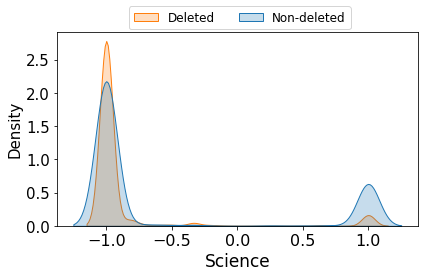

In [44]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v1(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_conditionaldistribution')

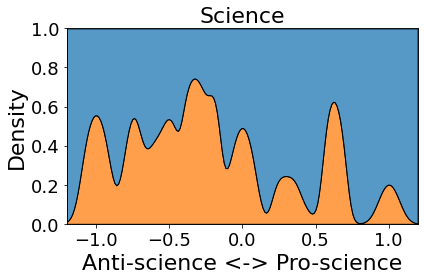

In [35]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v2(df, 'is_deleted','science' ,'Anti-science <-> Pro-science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_Normalizethestackeddistribution')

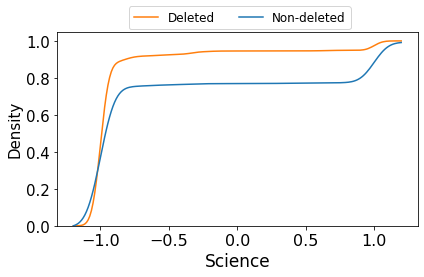

In [54]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v3(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

---

In [19]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram_kb(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('green')
    patches[1].set_label('Anti-Science')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('khaki')
    patches[9].set_label('Pro-Science')
        
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Science', fontsize=22)
    ax.set_ylabel('Number of users', fontsize=22)
    ax.set_xlabel(xlabel='Anti-science <-> Pro-science', fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #plt.title('Political polarization', fontsize=18)
    #plt.legend( fontsize=14)
    plt.legend(loc='upper center', fontsize=14)

    plt.tight_layout()

    plt.savefig('../plots/'+titel+'.pdf')

In [20]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

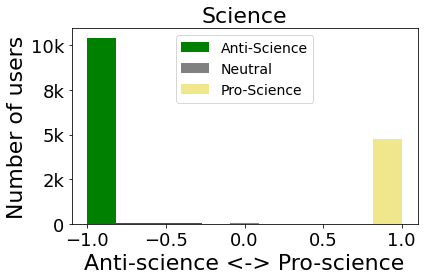

In [21]:
#All Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'],'hist_tweetsKB_science_polarized_users(alltweets)')

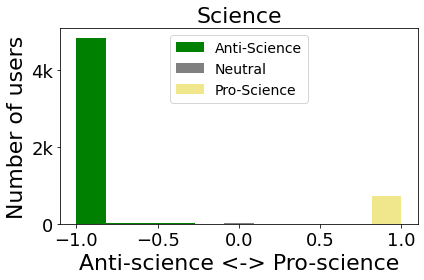

In [22]:
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'],'hist_tweetsKB_science_polarized_users(deletedtweets)')

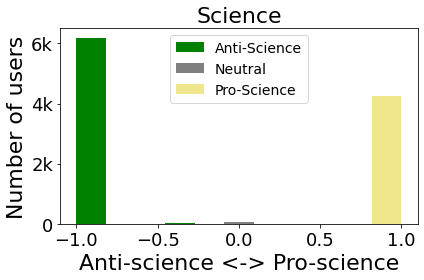

In [23]:
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['science'],'hist_tweetsKB_science_polarized_users(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

In [43]:
#All Tweets
df = df_tweetskb[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [44]:
density_hp(df,'density_hp_science_polarisation_tweetskb_alltweets' ,'science', 'Reputation', 'Greens')

In [45]:
density_hp(df_del,'density_hp_science_polarisation_tweetskb_deleted' ,'science', 'Reputation', 'Greens')

In [46]:
density_hp(df_undel,'density_hp_science_polarisation_tweetskb_nondeleted' ,'science', 'Reputation', 'Greens')